In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
data = load_breast_cancer()


In [3]:
df = pd.DataFrame(data = data.data,columns = data.feature_names)


In [4]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])



In [5]:
x = pd.DataFrame(data=data.target,columns = ["Result"])
finalDF = principalDf.join(x)
df.shape

(569, 30)

In [6]:
train, test = train_test_split(finalDF, test_size=0.2)

In [7]:
train_x = train["Result"]
test_x = test["Result"]

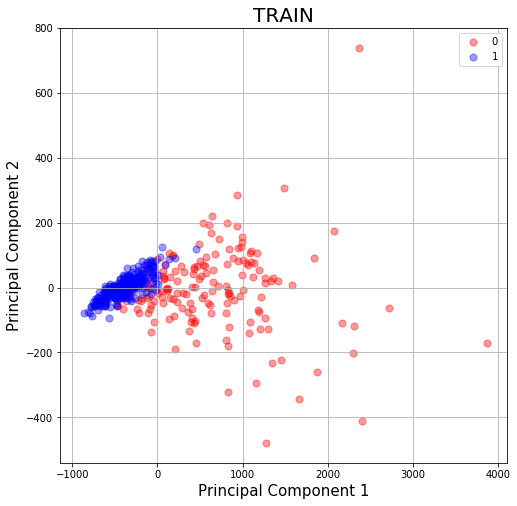

In [8]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('TRAIN', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = train['Result'] == target
    ax.scatter(train.loc[indicesToKeep, 'principal component 1']
               , train.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50
              , alpha = 0.4)
ax.legend(targets)
ax.grid()


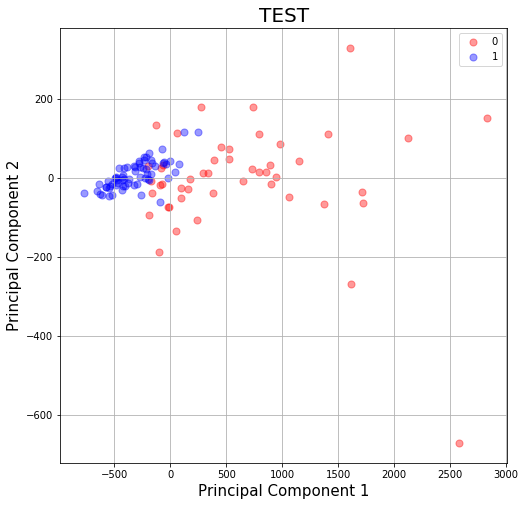

In [9]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('TEST', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = test['Result'] == target
    ax.scatter(test.loc[indicesToKeep, 'principal component 1']
               , test.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50
              , alpha = 0.4)
ax.legend(targets)
ax.grid()

In [10]:
train

,principal component 1,principal component 2,Result
81,-298.362656,22.672177,1
267,-236.592219,33.418779,1
153,-519.561601,-5.354182,1
471,-373.872299,-12.997158,1
319,-404.813013,37.428738,1
343,845.947142,119.000997,0
354,-506.414893,-9.527172,1
542,-39.662072,39.814822,1
338,-605.035298,-36.952914,1
158,-406.209055,3.983222,1


In [11]:
from sklearn.svm import SVC
del train["Result"]
clf = SVC(gamma='auto')
clf.fit(train, train_x) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
del test["Result"]
a = clf.predict(test)
len(a)

114

In [13]:
test_x

89     1
36     0
395    1
260    0
100    0
478    1
42     0
541    1
75     0
526    1
346    1
475    1
13     0
384    1
121    0
556    1
86     0
554    1
306    1
14     0
171    0
493    1
196    0
140    1
560    1
508    1
276    1
464    1
275    1
445    1
      ..
248    1
104    1
122    0
54     0
340    1
155    1
18     0
316    1
51     1
328    0
451    0
468    0
224    1
366    0
486    1
564    0
370    0
304    1
97     1
495    1
550    1
31     0
16     0
361    1
381    1
180    0
444    0
47     0
437    1
211    1
Name: Result, Length: 114, dtype: int64

In [14]:
a

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [15]:
#Grid size for test

max_1 = test.loc[test['principal component 1'].idxmax()]['principal component 1']

In [16]:
max_2 = test.loc[test['principal component 2'].idxmax()]['principal component 2']

In [17]:
min_1 = test.loc[test['principal component 1'].idxmin()]['principal component 1']

In [18]:
min_2 = test.loc[test['principal component 2'].idxmin()]['principal component 2']

In [19]:
x_axis = round((max_1 - min_1)/10)

In [20]:
y_axis = round((max_2-min_2)/10)

In [21]:
x_axis

360.0

In [22]:
y_axis

100.0

In [23]:
x_l = []
y_l = []
for i in range(0,11):
    x_l.append(min_1 + x_axis*i)

for i in range(0,11):
    y_l.append(min_2 + y_axis*i)


In [24]:
x_l

[-775.0549461651589,
 -415.05494616515887,
 -55.05494616515887,
 304.94505383484113,
 664.9450538348411,
 1024.945053834841,
 1384.945053834841,
 1744.945053834841,
 2104.945053834841,
 2464.945053834841,
 2824.945053834841]

In [25]:
y_l

[-671.5322625684614,
 -571.5322625684614,
 -471.5322625684614,
 -371.5322625684614,
 -271.5322625684614,
 -171.53226256846142,
 -71.53226256846142,
 28.46773743153858,
 128.46773743153858,
 228.46773743153858,
 328.4677374315386]

In [26]:
test = test.join(test_x)

In [27]:
def map(val_1,val_2):
    x_val = min_1
    y_val = min_2
    for i in range(10):
        if val_1> x_l[i] and val_1<x_l[i+1]:
            x_val = x_l[i+1]
            break
    for i in range(10):
        if val_1> y_l[i] and val_1<y_l[i+1]:
            y_val = y_l[i+1]
            break
    return([x_val,y_val])

In [34]:

data = []
i = 0
acc = 0
for r in test.values:
    grid = map(r[0],r[1])
    if(r[2]==a[i]):
        acc = 1
    else:
        acc = 0
    data.append([grid[0],grid[1],1,acc])
    i = i+1

In [35]:
data

[[-55.05494616515887, 28.46773743153858, 1, 1],
 [-55.05494616515887, -71.53226256846142, 1, 0],
 [-55.05494616515887, -171.53226256846142, 1, 1],
 [1384.945053834841, -671.5322625684614, 1, 0],
 [304.94505383484113, 28.46773743153858, 1, 0],
 [-415.05494616515887, -471.5322625684614, 1, 1],
 [1024.945053834841, -671.5322625684614, 1, 0],
 [-55.05494616515887, 28.46773743153858, 1, 1],
 [664.9450538348411, -671.5322625684614, 1, 0],
 [-55.05494616515887, -171.53226256846142, 1, 1],
 [-55.05494616515887, -371.5322625684614, 1, 1],
 [-55.05494616515887, -271.5322625684614, 1, 1],
 [304.94505383484113, 128.46773743153858, 1, 0],
 [-55.05494616515887, -271.5322625684614, 1, 1],
 [1024.945053834841, -671.5322625684614, 1, 0],
 [-415.05494616515887, -571.5322625684614, 1, 1],
 [-55.05494616515887, 28.46773743153858, 1, 0],
 [-55.05494616515887, -271.5322625684614, 1, 1],
 [-55.05494616515887, -171.53226256846142, 1, 1],
 [-55.05494616515887, -171.53226256846142, 1, 0],
 [304.94505383484113, 

In [36]:
dataframe = pd.DataFrame(data = data,columns=["X_grid","Y_grid","count","correct"])

In [37]:
dataframe

,X_grid,Y_grid,count,correct
0,-55.054946,28.467737,1,1
1,-55.054946,-71.532263,1,0
2,-55.054946,-171.532263,1,1
3,1384.945054,-671.532263,1,0
4,304.945054,28.467737,1,0
5,-415.054946,-471.532263,1,1
6,1024.945054,-671.532263,1,0
7,-55.054946,28.467737,1,1
8,664.945054,-671.532263,1,0
9,-55.054946,-171.532263,1,1


In [39]:
dataframe.groupby(['X_grid','Y_grid']).sum()

count  correct
X_grid       Y_grid                     
-775.054946  -671.532263      2        1
-415.054946  -571.532263      6        6
             -471.532263     11       11
             -371.532263      9        9
-55.054946   -371.532263      4        4
             -271.532263      8        8
             -171.532263     16       14
             -71.532263      10        3
              28.467737       4        3
 304.945054   28.467737       5        3
              128.467737      7        3
              228.467737      2        0
              328.467737      4        1
 664.945054  -671.532263      7        0
 1024.945054 -671.532263      9        0
 1384.945054 -671.532263      3        0
 1744.945054 -671.532263      5        0
 2464.945054 -671.532263      1        0
 2824.945054 -671.532263      1        0